In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = pd.read_csv("rating.csv", encoding="utf8")
anime = pd.read_csv("anime.csv")
data.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [12]:
data = pd.merge(data,anime.drop('rating',axis=1),on='anime_id')
data.head()

,user_id,anime_id,rating,name,genre,type,episodes,members
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
1,1,24,-1,School Rumble,"Comedy, Romance, School, Shounen",TV,26,178553
2,1,79,-1,Shuffle!,"Comedy, Drama, Ecchi, Fantasy, Harem, Magic, R...",TV,24,158772
3,1,226,-1,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,...",TV,13,623511
4,1,241,-1,Girls Bravo: First Season,"Comedy, Ecchi, Fantasy, Harem, Romance, School",TV,11,84395


In [13]:
data.groupby('name')['rating'].mean().sort_values(ascending=False).head(10)

name
Choegang Top Plate                                                  10.000000
STAR BEAT!: Hoshi no Kodou                                          10.000000
Shiroi Zou                                                          10.000000
Warui no wo Taose!! Salaryman Man                                   10.000000
Yakushiji Ryouko no Kaiki Jikenbo: Hamachou, Voice &amp; Fiction     9.000000
Tang Lang Bu Chan                                                    9.000000
Shiranpuri                                                           9.000000
Doukyuusei                                                           9.000000
Steins;Gate 0                                                        8.500000
Kimi no Na wa.                                                       8.297863
Name: rating, dtype: float64

In [15]:
data.groupby('name')['rating'].count().sort_values(ascending=False).head(10)

name
Death Note                          39340
Sword Art Online                    30583
Shingeki no Kyojin                  29584
Code Geass: Hangyaku no Lelouch     27718
Elfen Lied                          27506
Angel Beats!                        27183
Naruto                              25925
Fullmetal Alchemist                 25032
Fullmetal Alchemist: Brotherhood    24574
Toradora!                           24283
Name: rating, dtype: int64

(0.0, 3000.0)

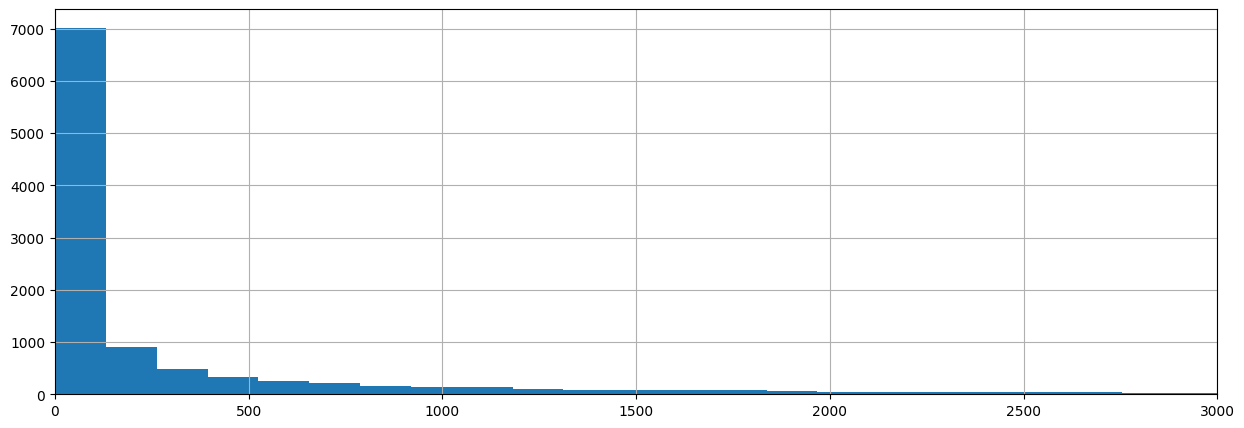

In [20]:
ratings = pd.DataFrame(data.groupby('name')['rating'].mean())
ratings['num of ratings'] = pd.DataFrame(data.groupby('name')['rating'].count())

genre_dict = pd.DataFrame(data=anime[['name','genre']])
genre_dict.set_index('name',inplace=True)

plt.figure(figsize=(15,5))
ratings['num of ratings'].hist(bins=300)
plt.xlim(0,3000)

In [21]:
ratings.head()

,rating,num of ratings
name,,
&quot;0&quot;,2.769231,26
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",0.000000,2
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,5.774936,782
&quot;Bungaku Shoujo&quot; Memoire,6.155748,809
&quot;Bungaku Shoujo&quot; Movie,6.457980,1535


<Axes: >

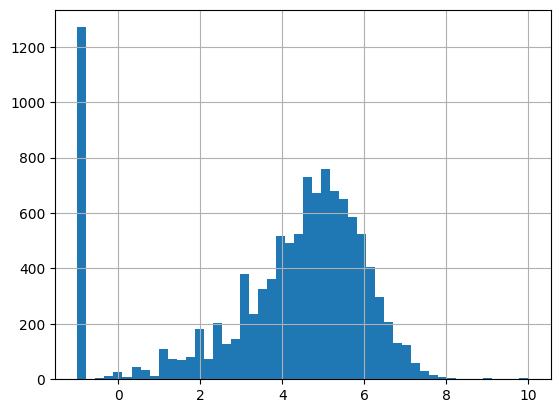

In [19]:
ratings['rating'].hist(bins=50)

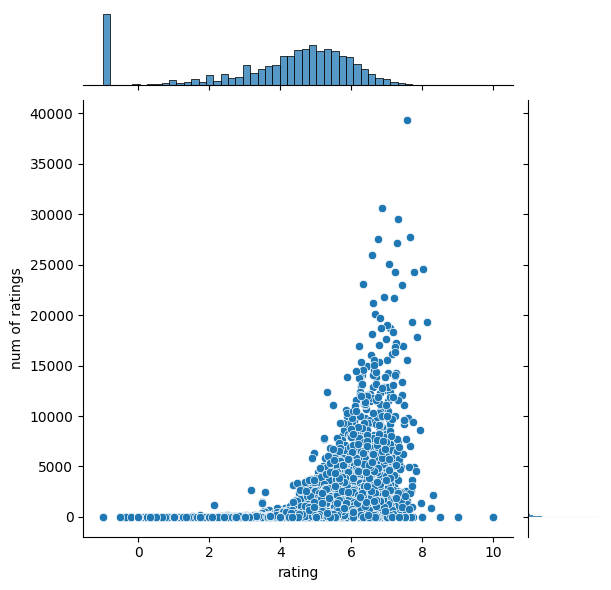

In [22]:
sns.jointplot(x='rating',y='num of ratings',data=ratings)

In [26]:
def check_genre(genre_list,string):
    if any(x in string for x in genre_list):
        return True
    else:
        return False
    
def get_recommendation(name):
    #generating list of anime with the same genre with target
    anime_genre = genre_dict.loc[name].values[0].split(', ')
    cols = anime[anime['genre'].apply(
        lambda x: check_genre(anime_genre,str(x)))]['name'].tolist()
    
    if name in data['name']:
        print("True")
    
    #create matrix based on generated list
    animemat = data[data['name'].isin(cols)].pivot_table(
        index='user_id',columns='name',values='rating')
       
    #create correlation table
    anime_user_rating = animemat[name]
    similiar_anime = animemat.corrwith(anime_user_rating)
    corr_anime = pd.DataFrame(similiar_anime,columns=['correlation'])
    corr_anime = corr_anime.join(ratings['num of ratings'])
    corr_anime.dropna(inplace=True)
    corr_anime = corr_anime[corr_anime['num of ratings'] > 5000].sort_values(
        'correlation',ascending=False)
    
    return corr_anime.head(10)

get_recommendation("Naruto")

c:\Users\chiss\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\chiss\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\chiss\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\chiss\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\chiss\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,correlation,num of ratings
name,,
Naruto,1.000000,25925
Bleach,0.720531,12845
InuYasha,0.704638,9328
Shaman King,0.696407,7814
Katekyo Hitman Reborn!,0.694202,6739
Tenjou Tenge,0.691476,5150
Sekirei,0.691413,7924
Rurouni Kenshin: Meiji Kenkaku Romantan,0.690855,7900
Shijou Saikyou no Deshi Kenichi,0.690250,5654
